# Principle Component Analysis

In [43]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import feature_selection

In [52]:
#load in and take a look at data
data = pd.read_csv("pre_processed_data.csv")
print(data.shape) # 178 samples 
data.head()

(178, 476)


,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Acetobacteraceae; __Belnapia,Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Comamonadaceae; __Tepidimonas,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Christensenellaceae; __Christensenellaceae_R_7_group,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Family_XIII; __Family_XIII_AD3011_group,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodobacterales; __Rhodobacteraceae; __Paracoccus,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminiclostridium,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Run_SP154; __f; __g,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Pasteurellales; __Pasteurellaceae; __Frederiksenia,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Corynebacterium_1,...,Bacteria; __Actinobacteria; __Actinobacteria; __Bifidobacteriales; __Bifidobacteriaceae; __Gardnerella,Bacteria; __Actinobacteria; __Actinobacteria; __Micrococcales; __Dermabacteraceae; __Brachybacterium,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Lawsonella,Bacteria; __Firmicutes; __Erysipelotrichia; __Erysipelotrichales; __Erysipelotrichaceae; __Erysipelotrichaceae_UCG_003,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Chitinophagaceae; __Lacibacter,Bacteria; __Firmicutes; __Clostridia; __Thermoanaerobacterales; __Family_III; __Thermoanaerobacterium,Bacteria; __Elusimicrobia; __Elusimicrobia; __Lineage_IIc; __f; __g,Bacteria; __Actinobacteria; __Actinobacteria; __Pseudonocardiales; __Pseudonocardiaceae; __Actinomycetospora,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Rhodospirillales_Incertae_Sedis; __Candidatus_Alysiosphaera,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Saprospiraceae; __uncultured
0,0.000000,0.0,0.0,0.0,0.000042,0.0,0.000085,0.0,0.0,0.000339,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000536,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023743,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.030726,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
pca = PCA(n_components=25)
pca.fit(data)

pca_data = pca.transform(data)

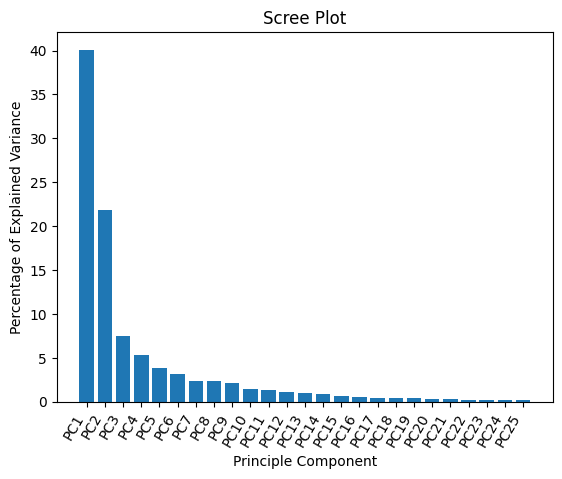

In [54]:
#visualize scree plot
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots()
ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principle Component")
ax.set_title("Scree Plot")

plt.xticks(rotation=60, ha='right')
plt.show()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.000582 -0.082549 -0.022636 -0.036139  0.010682 -0.028190 -0.007591   
1 -0.287078  0.345783  0.011912 -0.013554  0.013127  0.005619 -0.021896   
2 -0.009764 -0.067743 -0.011794 -0.039354 -0.064459  0.022144 -0.013563   
3  0.026569 -0.045589 -0.020007 -0.023764  0.015690 -0.025313 -0.002066   
4  0.060996 -0.087845 -0.012990 -0.049681  0.108550  0.111963  0.017272   

        PC8       PC9      PC10  ...      PC16      PC17      PC18      PC19  \
0 -0.010901 -0.002480 -0.001970  ... -0.011989  0.027698  0.028112  0.029046   
1  0.018063  0.001622 -0.003440  ... -0.015752  0.001630 -0.031417 -0.009332   
2  0.015752  0.000193 -0.002544  ... -0.003869 -0.008262 -0.002261 -0.003207   
3 -0.011298 -0.000479  0.011951  ... -0.011510 -0.015049 -0.031745 -0.001314   
4  0.035954 -0.055534  0.020931  ... -0.013707 -0.013330 -0.014405 -0.019712   

       PC20      PC21      PC22      PC23      PC24      PC25  
0 -0

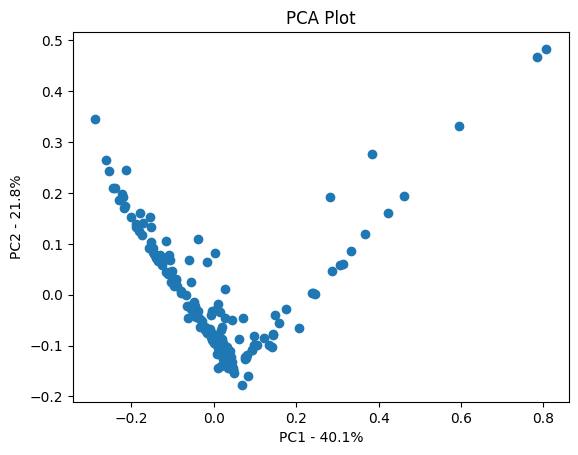

In [55]:
#visualize pca plot
pca_df = pd.DataFrame(pca_data, columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Plot")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

#for sample in pca_df:
#    plt.annotate(sample, (pca_df.PC1.loc(sample), pca_df.PC2.loc(sample)))

print(pca_df.head())

plt.show()

In [59]:
loadings = pca.components_
n_features = pca.n_features_
feature_names = data.columns
pc_list = ["PC" + str(x) for x in list(range(1, len(loadings)+1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')

loadings_df

/Users/jasmynpellebon/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
feature_names,,,,,,,,,,,,,,,,,,,,,
Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Acetobacteraceae; __Belnapia,3.030176e-04,-8.044549e-04,-0.000348,-0.001865,0.005691,0.007266,0.001445,0.003148,-0.005382,0.002906,...,-0.005584,-0.006082,-0.007126,-0.010454,-0.016512,0.032594,0.019517,0.009337,0.014170,-0.033414
Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Comamonadaceae; __Tepidimonas,1.157822e-04,-6.260065e-04,0.002647,0.000248,0.000521,-0.001420,-0.000345,-0.000372,0.000150,-0.000286,...,0.000241,0.017112,0.007243,-0.007458,0.005726,0.004605,0.002830,-0.002289,-0.005774,0.002348
Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Christensenellaceae; __Christensenellaceae_R_7_group,3.706929e-05,-5.199142e-04,-0.000365,-0.000811,0.000396,-0.000779,-0.000293,-0.000373,-0.000274,0.000160,...,-0.000069,-0.003910,-0.005249,-0.001134,-0.000961,-0.001590,-0.002588,-0.002376,-0.001803,-0.000565
Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,2.970632e-04,-1.579171e-04,0.000134,0.000264,-0.000436,-0.000151,-0.000136,-0.000108,-0.000112,-0.001002,...,0.001403,-0.002601,0.000236,-0.000044,-0.000094,-0.000699,-0.000045,0.000282,-0.002425,-0.002727
Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Family_XIII; __Family_XIII_AD3011_group,-7.164061e-05,-4.634631e-04,0.000096,0.001470,0.000687,-0.000798,0.000018,-0.000363,0.000007,0.000080,...,-0.000035,-0.002161,-0.003770,-0.003319,-0.002778,-0.000058,-0.003935,-0.003064,-0.002303,0.001278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bacteria; __Firmicutes; __Clostridia; __Thermoanaerobacterales; __Family_III; __Thermoanaerobacterium,1.008977e-04,-4.191840e-04,0.003768,0.000056,0.000326,-0.001096,-0.000334,0.000048,0.000355,0.000191,...,-0.000713,-0.000310,0.000187,0.000903,-0.000367,-0.000366,0.000437,0.000089,-0.000552,0.001005
Bacteria; __Elusimicrobia; __Elusimicrobia; __Lineage_IIc; __f; __g,-2.391191e-05,3.853396e-05,0.000002,-0.000050,-0.000015,0.000011,-0.000044,0.000016,-0.000020,0.000358,...,0.000206,0.000178,0.000140,0.000134,-0.000052,-0.000031,-0.000047,0.000262,0.000345,0.000242
Bacteria; __Actinobacteria; __Actinobacteria; __Pseudonocardiales; __Pseudonocardiaceae; __Actinomycetospora,-2.048542e-05,-1.415903e-04,-0.000151,-0.000254,0.000105,-0.000063,-0.000150,-0.000540,-0.000403,-0.002982,...,-0.000116,-0.000945,-0.001069,-0.000373,0.001934,0.000009,0.000576,-0.000970,0.000544,0.002317


In [60]:
max_values = loadings_df.max()
print(max_values)

PC1     0.765399
PC2     0.760839
PC3     0.983210
PC4     0.966431
PC5     0.458454
PC6     0.773493
PC7     0.847750
PC8     0.646634
PC9     0.866769
PC10    0.691069
PC11    0.606324
PC12    0.664975
PC13    0.777900
PC14    0.528426
PC15    0.808806
PC16    0.752008
PC17    0.793027
PC18    0.508580
PC19    0.585346
PC20    0.462057
PC21    0.619817
PC22    0.391772
PC23    0.311350
PC24    0.473909
PC25    0.346558
dtype: float64


In [65]:
max_values_index = loadings_df.idxmax()
print("The most important feature for PC1 is " + str(max_values_index[0]))
print("The most important feature for PC2 is " + str(max_values_index[1]))
print("The most important feature for PC3 is " + str(max_values_index[2]))
print("The most important feature for PC4 is " + str(max_values_index[3]))

The most important feature for PC1 is Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Escherichia_Shigella
The most important feature for PC2 is Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Bacteroidaceae; __Bacteroides
The most important feature for PC3 is Bacteria; __Proteobacteria; __Gammaproteobacteria; __Pasteurellales; __Pasteurellaceae; __Haemophilus
The most important feature for PC4 is Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; ___Eubacterium_rectale_group


# Hierarchical Clustering

In [81]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [67]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

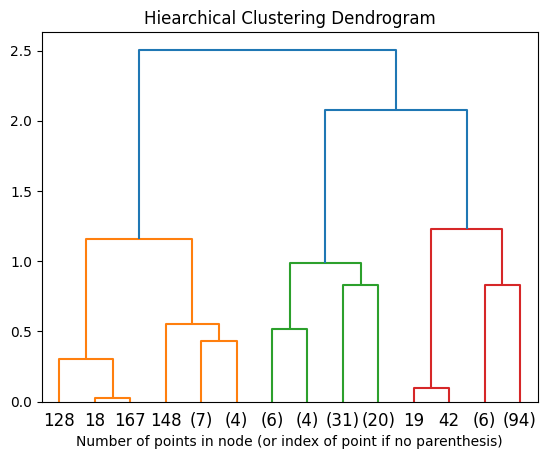

In [68]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

plt.title("Hiearchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

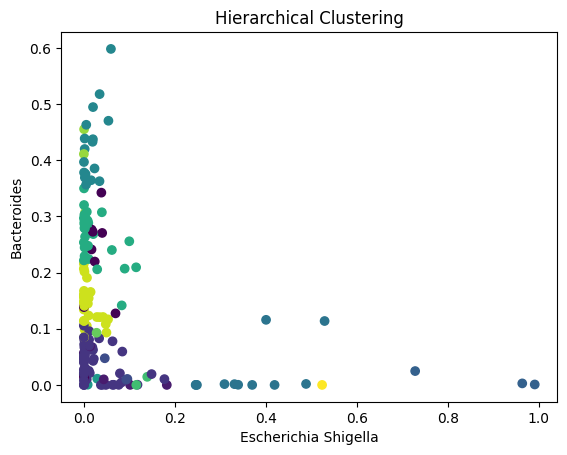

In [83]:
model2 = AgglomerativeClustering(n_clusters=14)
model2.fit(data)
data_labels = model2.labels_

plt.scatter(data['Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Escherichia_Shigella'], 
            data['Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Bacteroidaceae; __Bacteroides'],
           c = data_labels)
plt.title("Hierarchical Clustering")
plt.xlabel("Escherichia Shigella")
plt.ylabel("Bacteroides")

plt.show()